# Remarks

## Install `mcap`:
```
pip install mcap
```

## Download dataset, e.g. to `/mnt/c/bag/jkkds02/`:
``` bash
cd /mnt/c/bag/jkkds02/
```

``` bash
wget https://laesze-my.sharepoint.com/:u:/g/personal/herno_o365_sze_hu/EVofDCG_ORZJh--XTVLFsFEBOUYB1eAbHAzdTVDdf19Y9g?download=1 -O jkkds02.zip
```

Make sure you have `unzip` (`sudo apt-get install unzip`) and:

``` bash
unzip jkkds02.zip
``` 

## Possible bags:
```
nissan_zala_50_sagod_0.mcap
nissan_zala_50_zeg_1_0.mcap
nissan_zala_50_zeg_2_0.mcap
nissan_zala_50_zeg_3_0.mcap
nissan_zala_50_zeg_4_0.mcap
nissan_zala_90_country_road_1_0.mcap
nissan_zala_90_country_road_2_0.mcap
nissan_zala_90_mixed_0.mcap
```


In [1]:
# Reading from a MCAP file
# sudo apt install ros-$ROS_DISTRO-ros-base ros-$ROS_DISTRO-ros2bag ros-$ROS_DISTRO-rosbag2-transport ros-$ROS_DISTRO-rosbag2-storage-mcap 
import matplotlib.pyplot as plt
import numpy as np
from mcap import __version__
print(__version__)


"""script that reads ROS2 messages from an MCAP bag using the rosbag2_py API."""
import argparse
from rclpy.serialization import deserialize_message
from rosidl_runtime_py.utilities import get_message
import rosbag2_py


def read_messages(input_bag: str):
    reader = rosbag2_py.SequentialReader()
    reader.open(
        rosbag2_py.StorageOptions(uri=input_bag, storage_id="mcap"),
        rosbag2_py.ConverterOptions(
            input_serialization_format="cdr", output_serialization_format="cdr"
        ),
    )

    topic_types = reader.get_all_topics_and_types()

    def typename(topic_name):
        for topic_type in topic_types:
            if topic_type.name == topic_name:
                return topic_type.type
        raise ValueError(f"topic {topic_name} not in bag")

    while reader.has_next():
        topic, data, timestamp = reader.read_next()
        msg_type = get_message(typename(topic))
        msg = deserialize_message(data, msg_type)
        yield topic, msg, timestamp
    del reader


1.1.1


# Read some data and plot it:

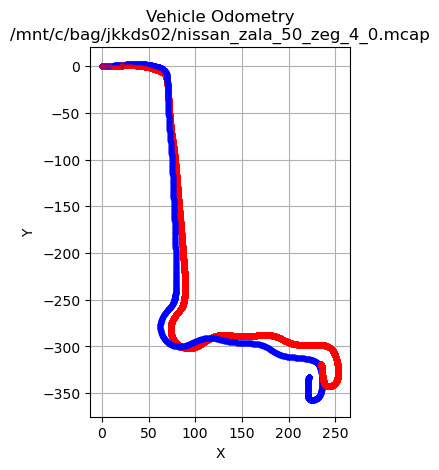

In [2]:
inpu = "/mnt/c/bag/jkkds02/nissan_zala_50_zeg_4_0.mcap"

i = 0
first_run = True
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Vehicle Odometry\n' + inpu)
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.grid(True)
wheelbase = 2.7
theta = -3.141592
pos_x = 0.0
pos_y = 0.0
prev_steer_time = 0.0
prev_speed_time = 0.0
steer_time = 0.0
speed_time = 0.0
speed_data = 0.0
steer_data = 0.0
for topic, msg, timestamp in read_messages(inpu):
    if(first_run):
        timestamp_start = timestamp
        first_run = False
    if (i % 1 == 0): # resample if necessary, 1 is no resampling
        if(topic == "/nissan/vehicle_steering"):
            steer_data = msg.data
            steer_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/nissan/vehicle_speed"):
            speed_data = msg.data
            speed_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/nissan/gps/duro/current_pose"):
            plt.plot(msg.pose.position.x, msg.pose.position.y, 'b.')
        steer_duration = prev_steer_time - steer_time
        speed_duration = prev_speed_time - speed_time
        # Ackermann Bicycle model
        pos_x += speed_duration * speed_data * np.cos(theta)
        pos_y += speed_duration * speed_data * np.sin(theta)
        theta += steer_duration * speed_data / wheelbase * np.tan(steer_data * -0.014)
        prev_steer_time = steer_time
        prev_speed_time = speed_time
        plt.plot(pos_x, pos_y, 'r.')
    i += 1

plt.show()


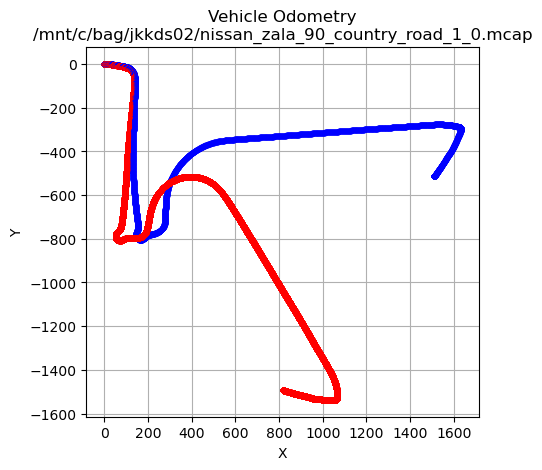

In [3]:
inpu = "/mnt/c/bag/jkkds02/nissan_zala_90_country_road_1_0.mcap"

i = 0
first_run = True
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Vehicle Odometry\n' + inpu)
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.grid(True)
wheelbase = 2.7
theta = -3.141592
pos_x = 0.0
pos_y = 0.0
prev_steer_time = 0.0
prev_speed_time = 0.0
steer_time = 0.0
speed_time = 0.0
speed_data = 0.0
steer_data = 0.0
for topic, msg, timestamp in read_messages(inpu):
    if(first_run):
        timestamp_start = timestamp
        first_run = False
    if (i % 1 == 0): # resample if necessary, 1 is no resampling
        if(topic == "/nissan/vehicle_steering"):
            steer_data = msg.data
            steer_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/nissan/vehicle_speed"):
            speed_data = msg.data
            speed_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/nissan/gps/duro/current_pose"):
            plt.plot(msg.pose.position.x, msg.pose.position.y, 'b.')
        steer_duration = prev_steer_time - steer_time
        speed_duration = prev_speed_time - speed_time
        # Ackermann Bicycle model
        pos_x += speed_duration * speed_data * np.cos(theta)
        pos_y += speed_duration * speed_data * np.sin(theta)
        theta += steer_duration * speed_data / wheelbase * np.tan(steer_data * -0.014)
        prev_steer_time = steer_time
        prev_speed_time = speed_time
        plt.plot(pos_x, pos_y, 'r.')
    i += 1

plt.show()